# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann et Q. Campeol, 2024-2025.  
## Séance 2

***
## 1. Manipulation et sorties graphiques

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.1 Imports</b>
</div>

In [3]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


In [1]:
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rpy2
import numpy as np

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.2 Charger le fichier de données
</b>
</div>

-  Chargez le contenu du fichier `Jura.txt` dans un DataFrame <code>Pandas</code> nommé <i>jura</i>.

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le fichier `Jura.txt` contient des données sur des métaux présents en traces dans les sols du Jura Suisse. <br>cf. <b>Goovaerts, P. 1997.</b> <i>Geostatistics for Natural Resources Evaluation.</i>  Oxford Univ. Press, New-York, 483 p. Appendix C  <br>
<br>
    <b>_Signification des variables_</b>  <br>
    <b>Xloc, Yloc:</b>  <br>
    Coordonnées dans un système local exprimées en km  <br>
<br>
    <b>Cd, Co, Cr, Cu, Ni, Pb, Zn:</b>  <br>
    teneurs exprimées en mg/kg de sol  <br>
<br>
    <b>Rock:</b><br>
    Type de substratum rocheux  <br>
    1: Argovien, 2: Kimmeridgien, 3: Sequanien, 4: Portlandien, 5: Quaternaire  <br>
<br>
    <b>Landuse:</b>  <br>
    Type d'occupation du sol  <br>
    1: Foret, 2: Paturages, 3: Prairies, 4: Cultures 
</div>

- Affichez les données

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le nombre d'échantillons est assez élevé.  <br>
    <code>head</code> et <code>tail</code> permettent de limiter l'affichage aux premiers ou aux derniers échantillons.
</div>

- Affichez les 5 premières lignes puis affichez les 3 dernières lignes.

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.3 Examiner le jeu de données</b>
</div>

In [4]:

%%display_prompt --title Question 1.3.1: --prompt 436f6d6269656e207920612d742d696c206427c3a96368616e74696c6c6f6e732064616e73206c65206a657520646520646f6e6ec3a96573203f200a0a --answer 20202020323539
# @info: Exécutez-moi pour afficher la question

ToggleButton(value=False, description='Solution')

Output()

-  Affichez un résumé du jeu de données, analysez-le et commentez-le

In [ ]:

%%display_prompt --title Question 1.3.2: --prompt 5175656c6c657320736f6e74206c61206d6f79656e6e65206574206c61206d656469616e65206465732074656e6575727320656e206361646d69756d2064616e73206c657320c3a96368616e74696c6c6f6e7320646520736f6c203f0a0a --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour afficher la question

Question 1.3.2: Quelles sont la moyenne et la mediane des teneurs en cadmium dans les échantillons de sol ?

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.4 Affichez le contenu du jeu de données sous forme graphique dans R
</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <code>plot</code> disponible dans <code>R</code>.<br>
<br>
    Vous pouvez fixer la taille des sorties graphiques en plaçant <code>%%R -w 800 -h 600</code> au début de la cellule. <br>Le code <code>-w 800</code> signifie 800 pixels de large et <code>-h 600</code>, 600 pixels de haut.<br>

</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.5 Afficher le contenu du jeu de données sous forme graphique dans Python</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <code>Pandas</code> offre la possibilité de représenter le DataFrame de façon analogue.
</div>

In [75]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


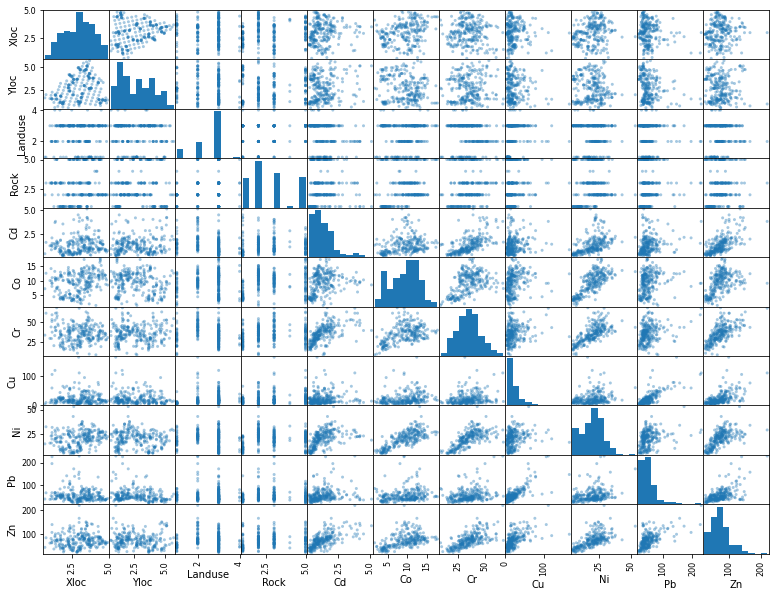

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question 1.5.1: </b><br>Comment interprétez-vous ces graphiques? </div> <br>
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.6 Examiner une distribution univariée</b>
</div>

-  Tracez l'histogramme de fréquences des teneurs en cadmium dans <code>Python</code>

In [76]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


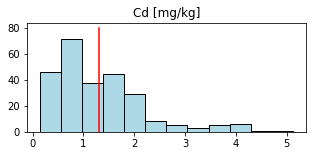

In [ ]:
# Résultat attendu ci-dessous...

- Tracez une boite à moustaches (<i>boxplot</i>) des teneurs en cadmium
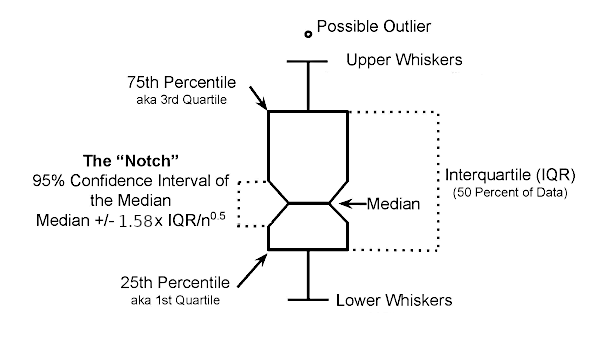

In [77]:
jura.boxplot?

In [78]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


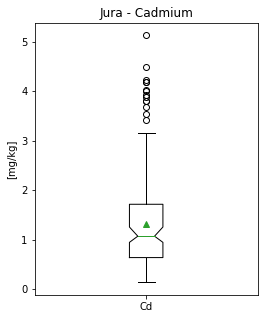

In [ ]:
# Résultat attendu ci-dessous...

- Afficher les différents quartiles et la moyenne des teneurs en cadmium

<b>Note:</b><br>    Les catégories d'occupation des sols et de substratum sont représentés dans le dataframe par des codes numériques.<br>
    <code>Pandas</code> offre la possibilité de les données catégorielles à l'aide du type <code>category</code>.<br>



- Définissez les associations entre codes et catégories pour les colonnes 'Landuse' et 'Rock' 

In [80]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Modifiez les colonnes 'Landuse' et 'Rock' pour en faire des colonnes de données catégorielles 

In [81]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Tracez des boîtes à moustaches de la distribution en cadmium pour chaque type d'occupation des sols

In [82]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b67
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


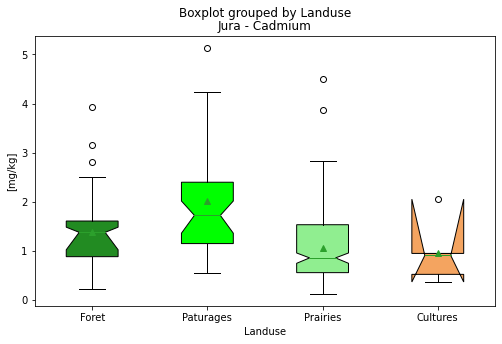

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.7 Tracer un graphe de y en fonction de x</b>
</div>

-  Tracez un graphe des teneurs en cobalt en fonction de celles en nickel

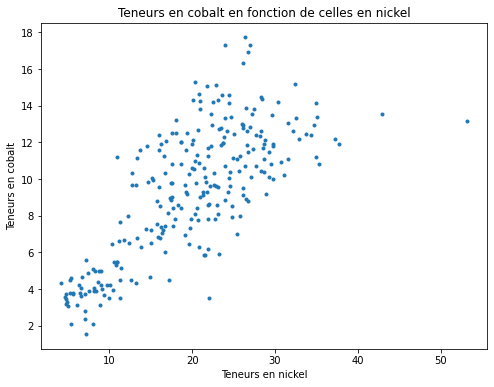

In [ ]:
# Résultat attendu ci-dessous...

![png_image](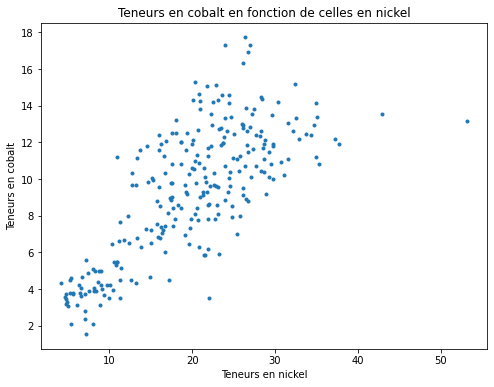
)  
~~~<Figure size 576x432 with 1 Axes>~~~  


<div class="alert alert-block alert-warning">
<b>Question 1.7.1: </b><br>Comment interprétez-vous ce graphique?
</div>

- Calculez la covariance entre les variables Co et Ni

In [ ]:
# Résultat attendu ci-dessous...

Covariance entre les variables Co et Ni : 22.103


- Calculez le coefficient de corrélation entre les variables Co et Ni

In [ ]:
# Résultat attendu ci-dessous...

Coefficient de corrélation entre les variables Co et Ni : 0.751


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.8 Construire un modèle de régression d'une variable sur une autre</b>
</div>

<b>Note:</b><br>    Une approche courante pour faire des prédictions est de modéliser le lien entre la variable à prédire et une (ou plusieurs) autres variables (continues ou catégorielles). Le lien spatial n'est pas examiné ici. <br>



- Construisez un modèle de régression linéaire des teneurs en cobalt sur celles en nickel

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Dans <code>R</code>, utilisez la fonction <code>lm</code>, utilisez ensuite <code>summary</code> pour examiner la qualité de l'ajustement.
</div>

In [20]:
%%R
?lm

File: /tmp/RtmprISDSE/Rtxt57cd1fad8d5
lm                    package:stats                    R Documentation



_F_i_t_t_i_n_g _L_i_n_e_a_r _M_o_d_e_l_s



_D_e_s_c_r_i_p_t_i_o_n:



     ‘lm’ is used to fit linear models.  It can be used to carry out

     regression, single stratum analysis of variance and analysis of

     covariance (although ‘aov’ may provide a more convenient interface

     for these).



_U_s_a_g_e:



     lm(formula, data, subset, weights, na.action,

        method = "qr", model = TRUE, x = FALSE, y = FALSE, qr = TRUE,

        singular.ok = TRUE, contrasts = NULL, offset, ...)

     

_A_r_g_u_m_e_n_t_s:



 formula: an object of class ‘"formula"’ (or one that can be coerced to

          that class): a symbolic description of the model to be

          fitted.  The details of model specification are given under

          ‘Details’.



    data: an optional data frame, list or environment (or object

          co

<b>Note:</b><br>    Des tests de student (t-test) sont faits pour chaque paramètre du modèle pour tester s'il est probable d'obtenir une valeur du paramètre supérieure ou égale à celle calculée dans le cas de l'hypothèse <b>H</b><sub>0</sub></i>: <i>le paramètre est nul</i>.<br>     <br>
    Le test de Fischer (F-statistic) permet de tester l'hypothèse <i>H<sub>0</sub></i>: <i>tous les coefficiens hormis la constante sont nuls</i> contre l'hypothèse alternative <i>H<sub>A</sub></i>: <i>l'ajustement d'un modèle à intercept simple est significativement moins bon que celui du modèle proposé</i>.  <br>
    La <i>p-value</i> indique si l'on doit rejeter l'hypothèse <i>H<sub>0</sub></i> ou pas. Si la <i>p-value</i> est très faible, <b>H<sub>0</sub></b> est très peu probable et peut être rejetée.  <br>
    On peut alors s'intéresser au R². <br><br>
    Le R² indique la force de la relation entre la variable expliquée et le modèle.


In [ ]:

%%display_prompt --title Question 1.8.1: --prompt 517565207369676e69666965206c6120736f72746965206465206c6120666f6e6374696f6e203c636f64653e73756d6d6172793c2f636f64653e206170706c697175c3a965206175206d6f64c3a86c652064652072656772657373696f6e3f0a202020205175656c6c657320736f6e7420766f7320636f6e636c7573696f6e73203f0a0a --answer 202020203c62723e0a20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e0a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a961697265203c62723e0a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e0a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e0a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e2020
# @info: Exécutez-moi pour afficher la question

Question 1.8.1: Que signifie la sortie de la fonction summary appliquée au modèle de regression?
 Quelles sont vos conclusions ?

- Affichez sur un graphe les couples (Ni, Co) et la droite de regression

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <code>plot</code> et la fonction <code>abline</code>
</div>

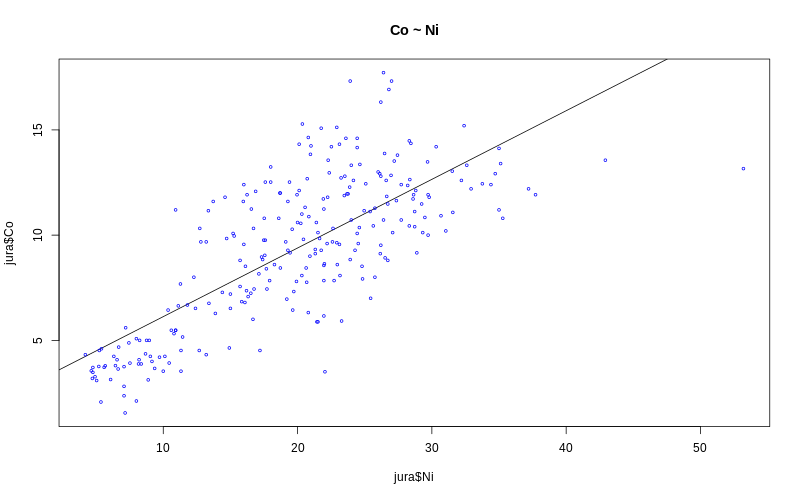

In [ ]:
# Résultat attendu ci-dessous...

![png_image](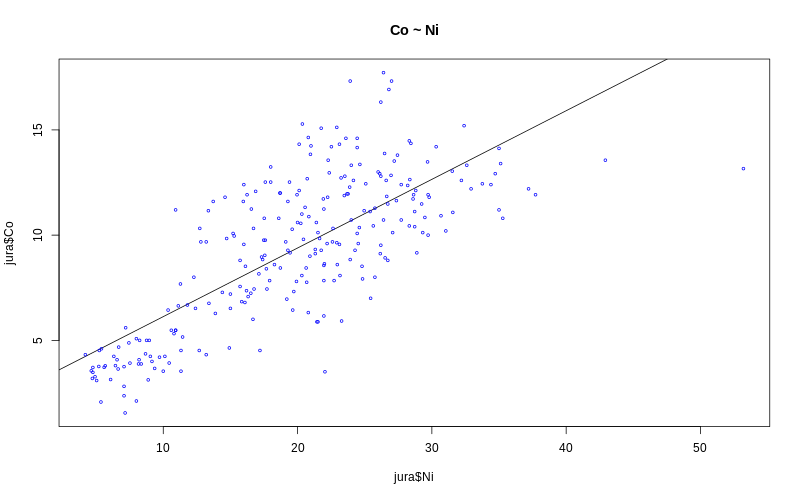
)  


- Affichez l'intervalle de confiance autour du modèle

In [24]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020203c62723e0a20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e0a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a961697265203c62723e0a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e0a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e0a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e2020
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


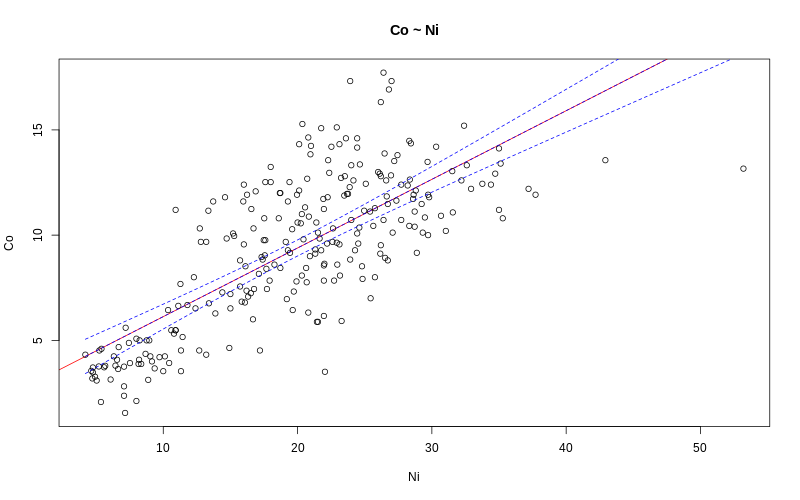

In [ ]:
# Résultat attendu ci-dessous...

-  Affichez sur un graphe les résidus en fonction de la teneur en nickel

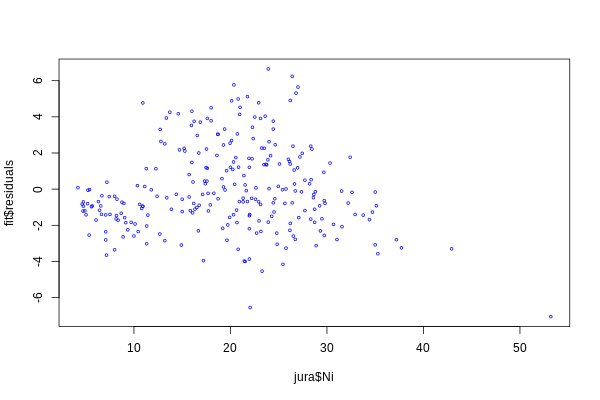

In [ ]:
# Résultat attendu ci-dessous...

![png_image](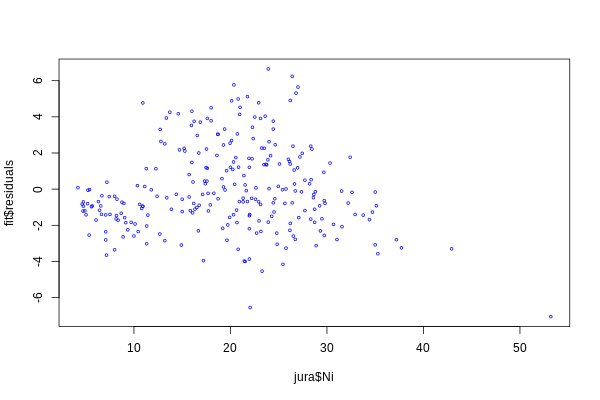
)  


- Affichez un graphe des résidus en identifiant les déviants

In [26]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020203c62723e0a20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e0a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a961697265203c62723e0a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e0a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e0a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e2020
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


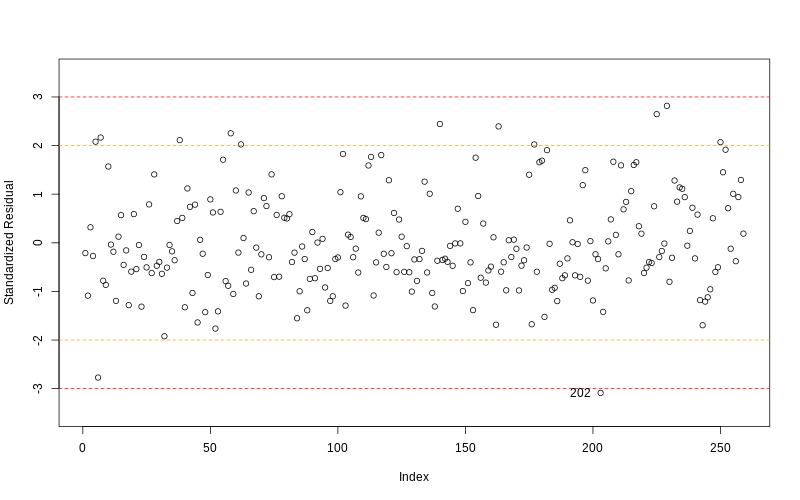

In [ ]:
# Résultat attendu ci-dessous...

In [27]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020203c62723e0a20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e0a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a961697265203c62723e0a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e0a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e0a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e2020
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


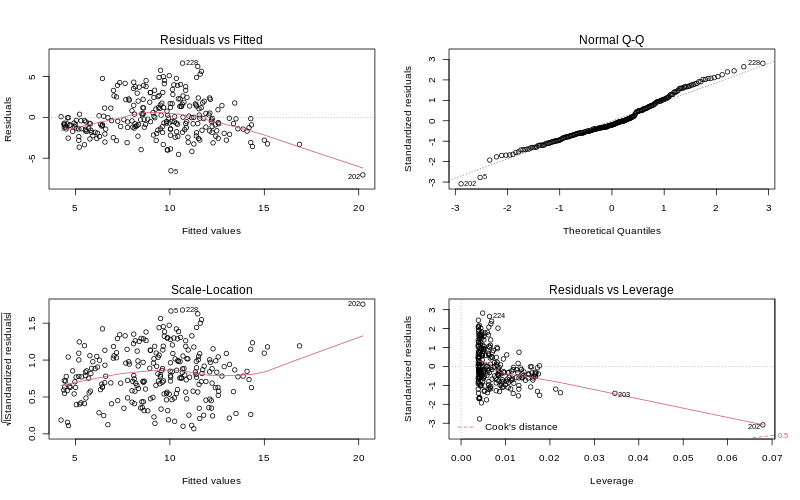

In [ ]:
# Résultat attendu ci-dessous...

<b>Note:</b><br>    <b>Graphe Residual vs Fitted</b> <br>
    Permet de vérifier si les résidus présentent une évolution non-linéaire. Si le modèle n'est pas capable de capturer tout le caractère non-linéaire d'une dépendance, cela apparaîtra sur ce graphe. Des résidus dispersés de part et d'autre d'une ligne horizontale dans ce graphe est un bon indicateur de l'absence d'une relation non-linéaire non capturée par le modèle.<br><br>
<br>
    <b>Graphe Normal Q-Q plot</b>   <br>
    Permet de vérifier si les résidus suivent une distribution normale.<br>  <br>
<br>
    <b>Graphe Scale-Location</b>   <br>
    Permet de vérifier la présence d'hétéroscedasticité. Si les résidus sont complètement aléatoirement répartis et la ligne est horizontale, on peut supposer l'homoscedasticité.<br>  <br>
<br>
    <b>Graphe Residual vs Leverage</b> <br>
    Permet d'identifier les cas qui ont de beaucoup d'influence sur l'ajustement du modèle. Certains déviants ont beaucoup d'influence sur l'ajustement alors que d'autre en auront peu.<br>
<br>
    - La distance de Cook mesure l'influence de l'observation _i_ sur l'estimation des paramètres du modèle. Toutes les distances devraient être du même ordre de grandeur. Sinon, les observations respectives biaisent l'estimation des coefficients de régression.<br>
<br>
    - Le _Leverage_ (effet de levier) mesure si l'observation est atypique par rapport aux variables explicatives. S'il l'est et que la distance de Cook est élevée, alors le cas a beaucoup d'influence sur l'ajustement.<br>
    </div>


In [ ]:

%%display_prompt --title Question 1.8.2: --prompt 5175656c7320736f6e74206c65732064c3a97669616e7473203f0a0a --answer 202020204c27c3a96368616e74696c6c6f6e206ec2b03230322065737420636c616972656d656e742064c3a97669616e742c206c6573206ec2b035206574206ec2b0323238206c6520736f6e742073616e7320646f75746520617573736920
# @info: Exécutez-moi pour afficher la question

Question 1.8.2: Quels sont les déviants ?

- Ecartez le ou les déviants et recalculer le modèle de régression 

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <code>R</code> est un nouveau language de programmation pour vous. Vérifiez si dans ce language, les indices d'un dataframe commencent également à 0 comme dans <code>Python</code>.
</div>

In [28]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 202020204c27c3a96368616e74696c6c6f6e206ec2b03230322065737420636c616972656d656e742064c3a97669616e742c206c6573206ec2b035206574206ec2b0323238206c6520736f6e742073616e7320646f75746520617573736920
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


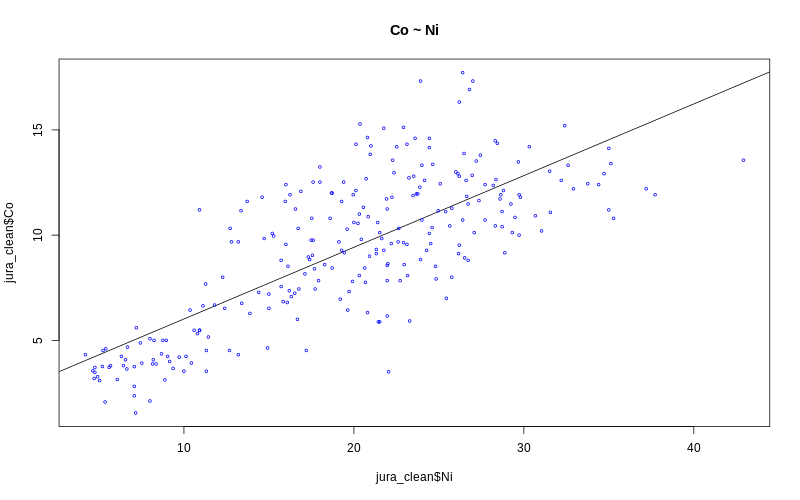

In [ ]:
# Résultat attendu ci-dessous...

![png_image](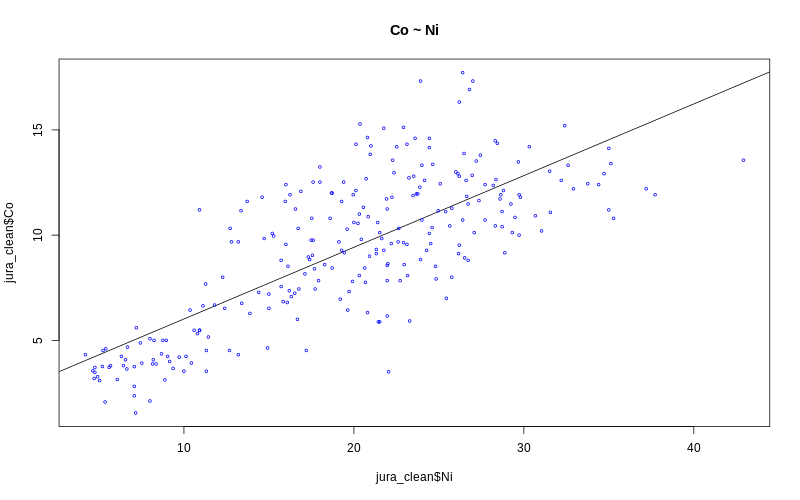
)  


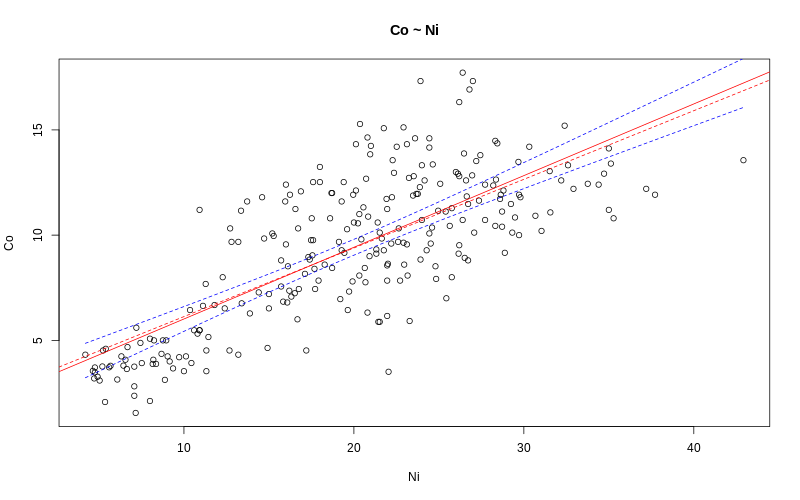

In [ ]:
# Résultat attendu ci-dessous...

![png_image](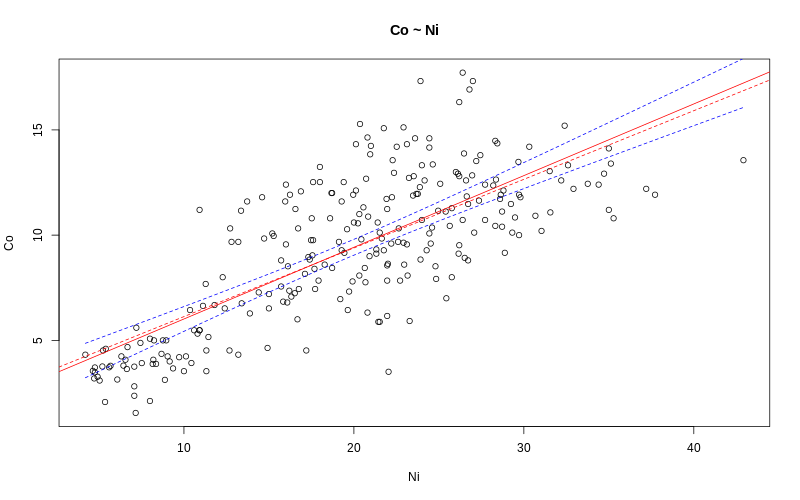
)  
